# Evaluate aruco file

In [6]:
# Aruco 
from bagpy import bagreader

def load_bag_file(file_path):
    try:
        # Load the bag file
        bag = bagreader(file_path)
        print(f"Bag loaded successfully: {file_path}")
        return bag
    except Exception as e:
        print(f"Failed to load bag file: {e}")
        return None

In [10]:
bag_stationary = load_bag_file('./bags/aruco_stationary.bag')

aruco = bag_stationary.message_by_topic('/aruco_single/pose')

[INFO]  Data folder ./bags/aruco_stationary already exists. Not creating.
Bag loaded successfully: ./bags/aruco_stationary.bag


In [12]:
import pandas

In [50]:
aruco_pd = pandas.read_csv(aruco)

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, z, title="3D Scatter Plot", xlabel="X", ylabel="Y", zlabel="Z"):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    ax.scatter(x, y, z, c='blue', marker='o', s=50, label='Points')
    
    # Add labels and title
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_zlabel(zlabel, fontsize=12)
    
    # Add legend and grid
    ax.legend()
    ax.grid(True)

    # Show the plot
    plt.show()



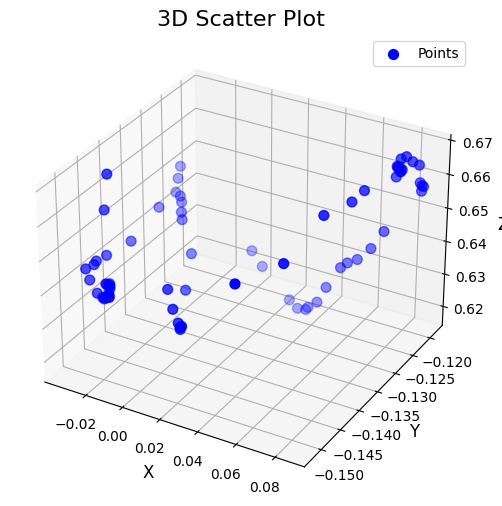

In [22]:
aruco_x = aruco_pd['pose.position.x']
aruco_y = aruco_pd['pose.position.y']
aruco_z = aruco_pd['pose.position.z']

# Points are in camera frame :) 
plot_3d(aruco_x, aruco_y, aruco_z)

In [42]:
aruco_qx = aruco_pd['pose.orientation.x'] 
aruco_qy = aruco_pd['pose.orientation.y'] 
aruco_qz = aruco_pd['pose.orientation.z'] 
aruco_qw = aruco_pd['pose.orientation.w']

In [43]:
import math

def quaternion_to_euler(qw, qx, qy, qz):
    # Roll (x-axis rotation)
    sinr_cosp = 2 * (qw * qx + qy * qz)
    cosr_cosp = 1 - 2 * (qx**2 + qy**2)
    roll = math.atan2(sinr_cosp, cosr_cosp)
    
    # Pitch (y-axis rotation)
    sinp = 2 * (qw * qy - qz * qx)
    if abs(sinp) >= 1:
        pitch = math.copysign(math.pi / 2, sinp)  # Use 90 degrees if out of range
    else:
        pitch = math.asin(sinp)
    
    # Yaw (z-axis rotation)
    siny_cosp = 2 * (qw * qz + qx * qy)
    cosy_cosp = 1 - 2 * (qy**2 + qz**2)
    yaw = math.atan2(siny_cosp, cosy_cosp)
    
    return roll, pitch, yaw


In [44]:
aruco_t = aruco_pd['Time']
aruco_roll, aruco_pitch, aruco_yaw = [], [], []
for qx_, qy_, qz_, qw_ in zip(aruco_qx, aruco_qy, aruco_qz, aruco_qw): 
    roll_, pitch_, yaw_ = quaternion_to_euler(qw_, qx_, qy_, qz_)
    aruco_roll.append(roll_)
    aruco_pitch.append(pitch_)
    aruco_yaw.append(yaw_)

In [45]:
def plot_euler_timeseries(t, roll, pitch, yaw):
    plt.figure(figsize=(6, 4))

    # Plot roll, pitch, and yaw
    plt.plot(t, roll, label="Roll", color="r", linestyle="-")
    plt.plot(t, pitch, label="Pitch", color="g", linestyle="--")
    plt.plot(t, yaw, label="Yaw", color="b", linestyle=":")

    # Add labels, legend, and title
    plt.title("Euler Angles Over Time", fontsize=16)
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Angle (radians)", fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

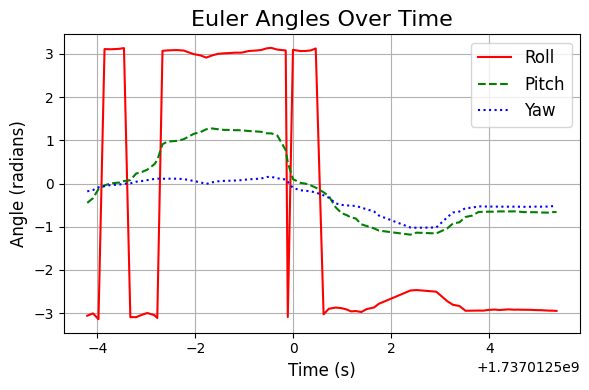

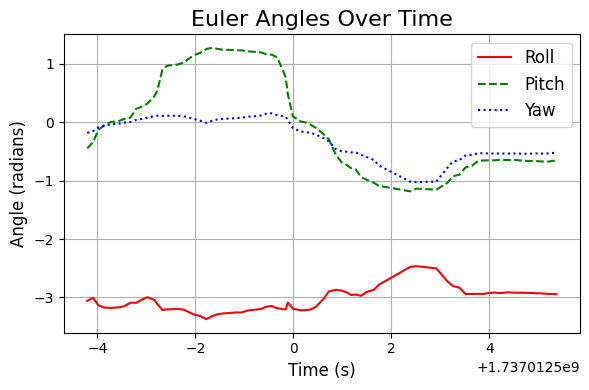

In [47]:
import numpy as np
# Constant ROLL
plot_euler_timeseries(aruco_t, aruco_roll, aruco_pitch, aruco_yaw)
# Unwrapped ROLL 
aruco_roll_ = np.unwrap(np.array(aruco_roll))
plot_euler_timeseries(aruco_t, aruco_roll_, aruco_pitch, aruco_yaw)


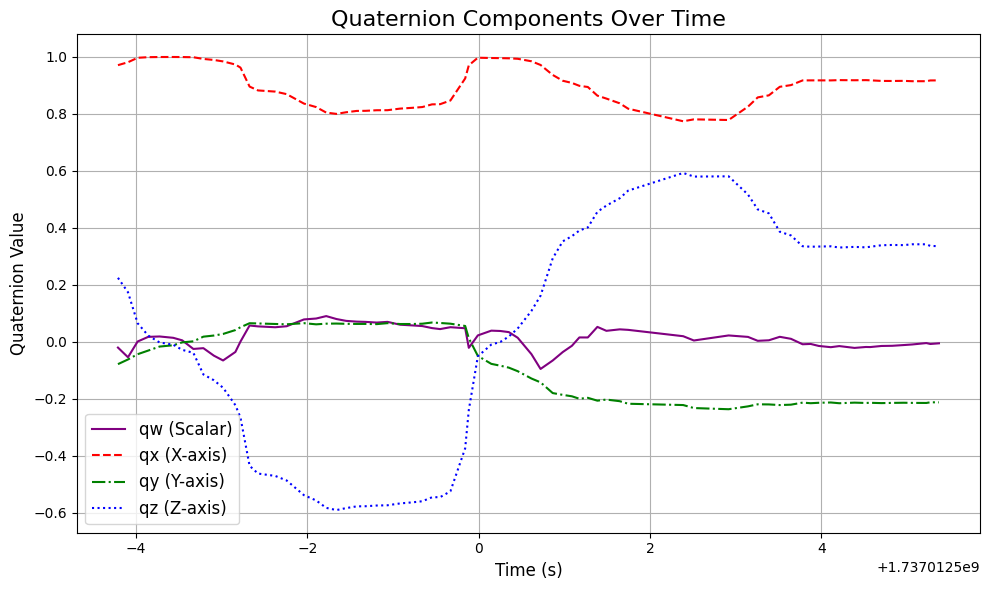

In [49]:
def plot_quaternion_timeseries(t, qw, qx, qy, qz):
    plt.figure(figsize=(10, 6))

    # Plot quaternion components
    plt.plot(t, qw, label="qw (Scalar)", color="purple", linestyle="-")
    plt.plot(t, qx, label="qx (X-axis)", color="r", linestyle="--")
    plt.plot(t, qy, label="qy (Y-axis)", color="g", linestyle="-.")
    plt.plot(t, qz, label="qz (Z-axis)", color="b", linestyle=":")

    # Add labels, legend, and title
    plt.title("Quaternion Components Over Time", fontsize=16)
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Quaternion Value", fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_quaternion_timeseries(aruco_t, aruco_qw, aruco_qx, aruco_qy, aruco_qz)

## TODO: 
- [ ] Compare aruco and optitrack
- [ ] Use optitrack markers to generate reference
- [ ] Add aruco for both hands
- [ ] Compare precision of the optirack and the ARUCO
## Ideas
- [ ] [LIDAR + CAMERA for the depth measurement](https://github.com/Deephome/Awesome-LiDAR-Camera-Calibration) 